# Downloading S&P 500 price data

In [1]:
import yfinance as yf

In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-22 00:00:00-05:00,6081.390137,6100.810059,6076.129883,6086.370117,4323040000,0.0,0.0
2025-01-23 00:00:00-05:00,6076.319824,6118.729980,6074.669922,6118.709961,4432250000,0.0,0.0
2025-01-24 00:00:00-05:00,6121.430176,6128.180176,6088.740234,6101.240234,4214250000,0.0,0.0


In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-01-14 00:00:00-05:00', '2025-01-15 00:00:00-05:00',
               '2025-01-16 00:00:00-05:00', '2025-01-17 00:00:00-05:00',
               '2025-01-21 00:00:00-05:00', '2025-01-22 00:00:00-05:00',
               '2025-01-23 00:00:00-05:00', '2025-01-24 00:00:00-05:00',
               '2025-01-27 00:00:00-05:00', '2025-01-28 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24384, freq=None)

# Cleaning and visualising Stock Market data

<Axes: xlabel='Date'>

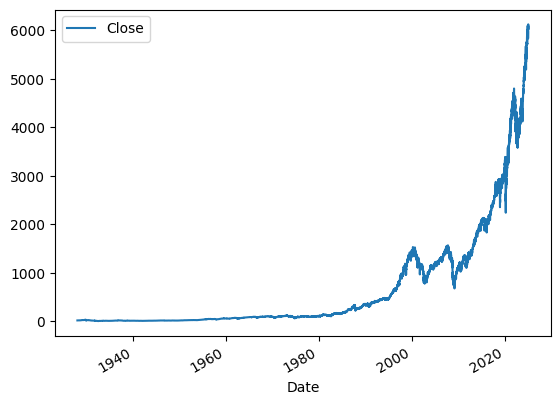

In [6]:
sp500.plot.line(y="Close", use_index=True) # Plots 'trading days' against their corresponding closing prices

In [7]:
del sp500["Dividends"]
del sp500["Stock Splits"] # These columns are more useful for individual stocks, not an index

# Setting up Target for Machine Learning

In [8]:
sp500["Tomorrow"] = sp500["Close"].shift(-1) # Column for next day's closing price

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-01-22 00:00:00-05:00,6081.390137,6100.810059,6076.129883,6086.370117,4323040000,6118.709961
2025-01-23 00:00:00-05:00,6076.319824,6118.729980,6074.669922,6118.709961,4432250000,6101.240234
2025-01-24 00:00:00-05:00,6121.430176,6128.180176,6088.740234,6101.240234,4214250000,6012.279785


In [10]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int) # If tomorrow's closing price is greater than today's, astype(int) makes boolean a number where 1 means it's greater and 0 means it isn't

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-01-22 00:00:00-05:00,6081.390137,6100.810059,6076.129883,6086.370117,4323040000,6118.709961,1
2025-01-23 00:00:00-05:00,6076.319824,6118.729980,6074.669922,6118.709961,4432250000,6101.240234,0
2025-01-24 00:00:00-05:00,6121.430176,6128.180176,6088.740234,6101.240234,4214250000,6012.279785,0


In [12]:
sp500 = sp500.loc["1990-01-01":].copy() # Only rows with indexes after 01/01/1990 as previous data is irrelevant due to major changes in the market
# .copy() needed to prevent pandas 'setting with copy' warning when trying to subset a dataframe and later assigning back to it.

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-01-22 00:00:00-05:00,6081.390137,6100.810059,6076.129883,6086.370117,4323040000,6118.709961,1
2025-01-23 00:00:00-05:00,6076.319824,6118.729980,6074.669922,6118.709961,4432250000,6101.240234,0
2025-01-24 00:00:00-05:00,6121.430176,6128.180176,6088.740234,6101.240234,4214250000,6012.279785,0


# Training an Initial Machine Learning Model

In [14]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest chosen because:
#    1. It trains multiple decision trees with randomised parameters and averaging the results from the trees, which makes Random Forests more resistant to overfitting than other models
#    2. They run relatively quickly
#    3. Can detect non-linear tendencies in the data

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)   # n_estimators = n_individual decision trees, min_sample_split helps protect against overfitting but the higher it is, the lower the accuracy, random_state causes random numbers that are generated to be in a predictable sequence each time which helps when updating or improving model

train = sp500.iloc[:-100] # Data is time-series so cross validation is unsuitable as it produces good results when training but terrible in real life due to the fact that it doesn't take the data's time-series nature into account, which causes future data to be used to predict the past and is basically giving the model clues it won't get in real-life (leaking)
test = sp500.iloc[-100:] 

predictors = ["Close", "Volume", "Open", "High", "Low"] # Columns used to make predictions
model.fit(train[predictors], train["Target"]) # Uses 'predictors' columns to train the model in order to predict 'Target'

RandomForestClassifier(min_samples_split=100, random_state=1)

# Measuring model accuracy

In [15]:
from sklearn.metrics import precision_score
import pandas as pd

preds = model.predict(test[predictors]) # Generates predictions using model using 'test' dataset

In [16]:
preds = pd.Series(preds, index=test.index)

In [17]:
precision_score(test["Target"], preds) # Calculate precision score using actual Target and predicted Target

0.7142857142857143

In [18]:
combined = pd.concat([test["Target"], preds], axis=1) # Concatenates/combines actual Target values with predicted Target values in order to plot the predictions, axis=1 means each input is treated as a column

<Axes: xlabel='Date'>

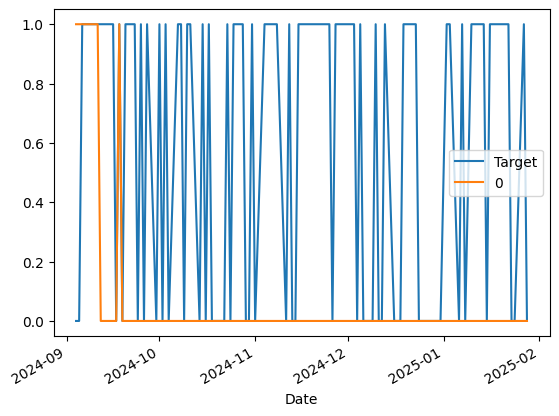

In [19]:
combined.plot() # 0(orange) = predictions, Target(blue) = actual values

# Building a Backtesting System

In [20]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [21]:
def backtest(data, model, predictors, start=2500, step=250): # 1 trading year ~ 250 days so start=2500 takes 10 years of data as training data for model, step=250 trains model on each year's data one at a time so it can predict for multiple years
    all_predictions = []

    for i in range(start, data.shape[0], step): # Iterates across data year by year and make predictions for all years apart from the first 10
        train = data.iloc[0:i].copy() # All years before current year
        test = data.iloc[i:(i+step)].copy() # Current year
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions) # Appends predictions for given year

    return pd.concat(all_predictions)

In [22]:
predictions = backtest(sp500, model, predictors)

In [23]:
predictions["Predictions"].value_counts()

Predictions
0    3698
1    2636
Name: count, dtype: int64

In [24]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5284522003034902

In [25]:
predictions["Target"].value_counts() / predictions.shape[0] # Benchmark for accuracy by dividing counts for '0' and '1' by the number of rows

Target
1    0.536154
0    0.463846
Name: count, dtype: float64

# Adding Additional Predictors to Model

In [26]:
horizons = [2, 5, 60, 250,1000] # Horizons on which we want to look at rolling means: Mean 'Close' price for last 2 days, last 5 days(week), last 60 days(3 months), last year and last 4 years and find the mean of today's 'Close' price and the 'Close' prices in the horizon periods
new_predictors = [] # Holds new columns

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean() # Calculate rolling average against horizon and take the mean

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"] # S&P500 close price divided by calculated rolling average

    trend_column = f"Trend_{horizon}" # Number of days in past {horizon} days where stock price went up
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"] # Forward shift and rolling sum of target, shows 'NaN' if pandas can't find enough days/rows before current row to calculate rolling average

    new_predictors += [ratio_column, trend_column]

In [27]:
sp500.dropna()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-21 00:00:00-05:00,6014.120117,6051.509766,6006.879883,6049.240234,4702920000,6086.370117,1,1.004365,2.0,1.015789,4.0,1.018187,35.0,1.102033,144.0,1.329228,529.0
2025-01-22 00:00:00-05:00,6081.390137,6100.810059,6076.129883,6086.370117,4323040000,6118.709961,1,1.003060,2.0,1.013735,4.0,1.023607,36.0,1.107811,144.0,1.336712,529.0
2025-01-23 00:00:00-05:00,6076.319824,6118.729980,6074.669922,6118.709961,4432250000,6101.240234,0,1.002650,2.0,1.013423,4.0,1.028155,36.0,1.112685,144.0,1.343105,530.0


# Improving Model

In [28]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [33]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1] # Returns a probability that the row will be '0' or '1' instead of '0' or '1'  to give more control over what becomes a '0' or '1', [:,1} returns second column which is probability that stock price goes up
    preds[preds >= 0.6] = 1 # Set custom threshold where a probability >= 60% results in the model returning that the price will increase, which reduces total number of days it predicts a price increase but increase the chance that the price will actually go up on those days
    preds[preds < 0.6] = 0
    # preds[preds >= 0.7] = 1
    # preds[preds < 0.7] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [34]:
predictions = backtest(sp500, model, new_predictors) # No Close, open, high, low and volume as they're just numbers that aren't actually informative for the model, but the ratios are most informative

In [35]:
predictions["Predictions"].value_counts()

Predictions
0.0    5298
1.0    1036
Name: count, dtype: int64

In [36]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5434362934362934